## Building a CNN classifier for the [cifar dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

Based on the precedent cells and using the same process, build a classification model using cnn and evaluate its performance.

This part will count for your final grade.

Optional : Try to search in the keras/tensorflow documentation for the way to use pre-trained RESNET models and use it to build a second model

Importation du Dataset et des Libraries utiles

In [1]:
import os
if not os.path.isfile('pml_utils.py'):
  !wget https://raw.githubusercontent.com/AXI-Technologies/deep-learning-materials/master/pml_utils.py
from pml_utils import show_failures
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.utils import plot_model, to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
nb_classes = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

print()
print('cifar10 data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


cifar10 data loaded: train: 50000 test: 10000
X_train: (50000, 32, 32, 3)
y_train: (50000, 1)
Y_train: (50000, 10)


Mise en place des caractéristiques de l'image

In [2]:
# Dimensions de l'image : 32px x 32px
img_rows, img_cols = 32, 32

# Reformation de l'image en fonction des critères précédents
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)
    
print('X_train:', X_train.shape)

X_train: (50000, 32, 32, 3)


Mise en place des hyperparamètres :

In [3]:
# Etablissement du filtre Kernel utilisé
kernel_size = (3, 3)

# Etablissement de la taille du pooling en sortie :
pool_size = (2, 2)

model = Sequential()

model.add(Conv2D(32, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation ='relu'))
model.add(Conv2D(32, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation ='relu'))

model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation ='relu'))
model.add(Conv2D(64, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation ='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size,
                 padding='valid',
                 input_shape=input_shape,
                 activation ='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size,
                 padding='valid',
                 input_shape=input_shape, 
                 activation ='relu'))

#Réduction de la résolution perçue
model.add(MaxPooling2D(pool_size=pool_size))

#Utilisation du Dropout pour "éteindre" aléatoirement des cellules
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.25))

#Dernière couche de filtre pour obtenir ce que l'on souhaite
model.add(Dense(10, activation='softmax'))

# Choix de l'Optimisateur à utiliser pour avoir les meilleurs résultats
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        3

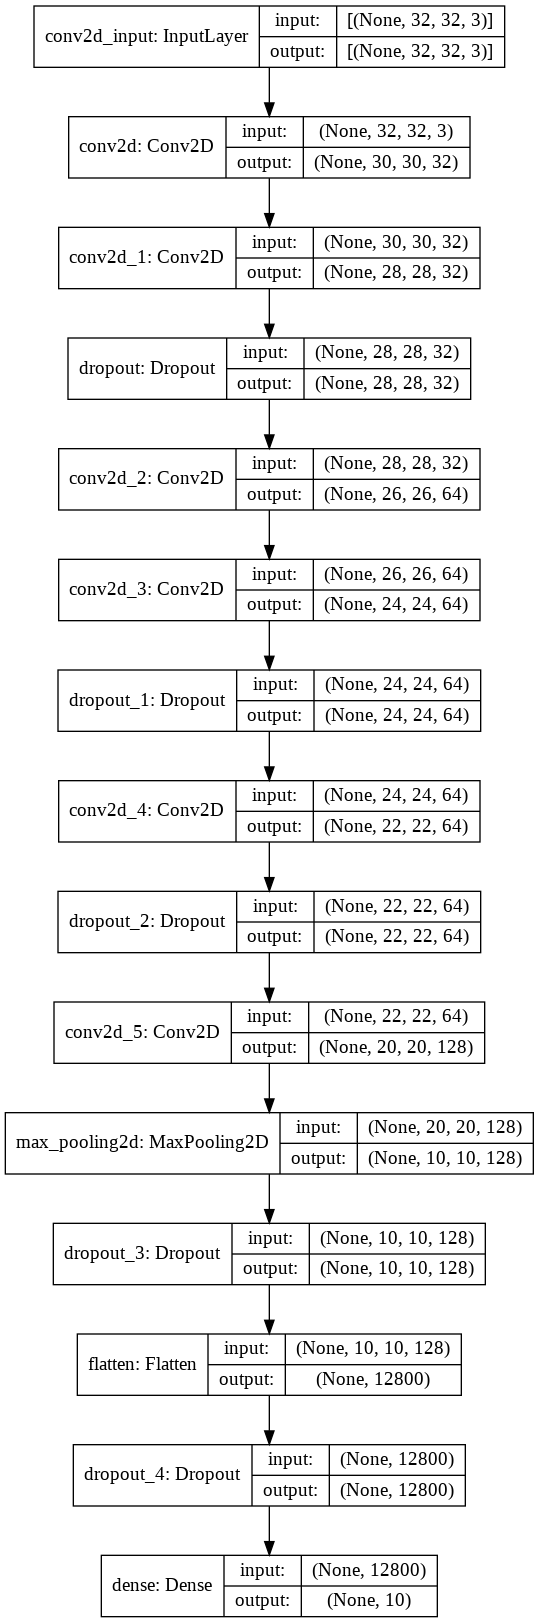

In [4]:
#Représentation graphique de notre architecture
plot_model(model, show_shapes=True)

In [5]:
%%time

epochs = 80 # Chaque epoch prend environ 10 secondes

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=2,
                    validation_split = 0.18)

Epoch 1/80
321/321 - 21s - loss: 1.9296 - accuracy: 0.3044 - val_loss: 1.8965 - val_accuracy: 0.3253
Epoch 2/80
321/321 - 17s - loss: 1.5466 - accuracy: 0.4494 - val_loss: 1.5053 - val_accuracy: 0.4814
Epoch 3/80
321/321 - 17s - loss: 1.3657 - accuracy: 0.5183 - val_loss: 1.3404 - val_accuracy: 0.5158
Epoch 4/80
321/321 - 17s - loss: 1.2342 - accuracy: 0.5687 - val_loss: 1.2243 - val_accuracy: 0.5706
Epoch 5/80
321/321 - 17s - loss: 1.1253 - accuracy: 0.6075 - val_loss: 1.5527 - val_accuracy: 0.5132
Epoch 6/80
321/321 - 17s - loss: 1.0377 - accuracy: 0.6391 - val_loss: 1.1443 - val_accuracy: 0.6008
Epoch 7/80
321/321 - 17s - loss: 0.9639 - accuracy: 0.6664 - val_loss: 0.9618 - val_accuracy: 0.6664
Epoch 8/80
321/321 - 17s - loss: 0.9046 - accuracy: 0.6866 - val_loss: 1.0779 - val_accuracy: 0.6340
Epoch 9/80
321/321 - 17s - loss: 0.8560 - accuracy: 0.7034 - val_loss: 0.9920 - val_accuracy: 0.6571
Epoch 10/80
321/321 - 17s - loss: 0.8162 - accuracy: 0.7164 - val_loss: 0.8889 - val_accura

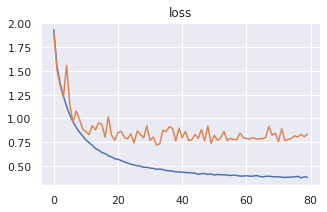

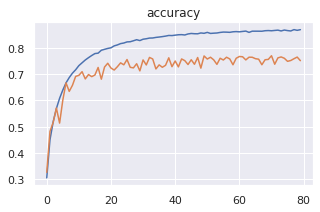

In [6]:
#On affiche l'évolution des loss et accuracy

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], history.history['val_loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'], history.history['val_accuracy'])
plt.title('accuracy');

In [7]:
%%time
scores = model.evaluate(X_test, Y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 - 2s - loss: 0.8491 - accuracy: 0.7501
accuracy: 75.01%
CPU times: user 1.47 s, sys: 352 ms, total: 1.82 s
Wall time: 2.21 s
